<a href="https://colab.research.google.com/github/Harshaljadhao20/Netflix-Data-Analysis-project/blob/main/Netflix_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [179]:
df = pd.read_csv("/content/mymoviedb.csv", lineterminator="\n")

In [180]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [182]:
df["Genre"].head()

,Genre
0,"Action, Adventure, Science Fiction"
1,"Crime, Mystery, Thriller"
2,Thriller
3,"Animation, Comedy, Family, Fantasy"
4,"Action, Adventure, Thriller, War"


In [183]:
df.duplicated().sum()

np.int64(0)

In [184]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


# Exploration Summary



*  we have a dataframe consisting of 9827 rows and 9 columns.
*  our dataset looks a bit a tidy with on NaNs nor duplicated values.
*   Release_Date column needs to be casted into date time and to extract onley year value.
*  Overview, Original_Languege and Poster-Url wouldn't be so useful during analysis, so we'll drop them.
*  there is noticsble outliers in Popularity np.column
*  Vote_Average better br categorised for proper anlaysis
*  Genre coloumn has comma saperated values and wite spaces that need to be handled and casted into category.Exploration Summary  











In [185]:
# Convert Object to Integer in Release_Date

df['Release_Date'] = pd.to_datetime(df["Release_Date"])

print(df['Release_Date'].dtypes)

datetime64[ns]


In [186]:
df["Release_Date"] = df['Release_Date'].dt.year

df["Release_Date"].dtypes

dtype('int32')

In [187]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [188]:
#Dropping Coloumns

col  = ["Overview","Original_Language","Poster_Url"]
df.drop(col, axis=1, inplace=True)


In [189]:
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

**Categorixig `Vote_Average`** column

> Add blockquote



We would cut **`Vote_Average`** values and make 4 categories **`poppular`** **`average`**   **`below_avg`** **`not_popular`** to describe it move using **`catigorize_col`( )** function provided about

In [190]:
def catigorize_col(df, col, labels):

  edges = [df[col].describe()["min"],
             df[col].describe()["25%"],
             df[col].describe()["50%"],
             df[col].describe()["75%"],
             df[col].describe()["max"]]
  df[col] = pd.cut(df[col], edges, labels=labels, duplicates="drop")
  return df

In [191]:
labels = ["not_propular","below_avg","average","poppular"]

catigorize_col(df, "Vote_Average", labels)
df["Vote_Average"].unique()


['poppular', 'below_avg', 'average', 'not_propular', NaN]
Categories (4, object): ['not_propular' < 'below_avg' < 'average' < 'poppular']

In [192]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,poppular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,poppular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,poppular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [193]:
df["Vote_Average"].value_counts()

,count
Vote_Average,
not_propular,2467
poppular,2450
average,2412
below_avg,2398


In [194]:
df.dropna(inplace=True)

df.isna().sum()

,0
Release_Date,0
Title,0
Popularity,0
Vote_Count,0
Vote_Average,0
Genre,0


### We'd split genres into a list and then explode our dataframe to have only one genre per row for ezch movie

In [195]:
df["Genre"] = df["Genre"].str.split(', ')

df = df.explode("Genre").reset_index(drop=True)

In [196]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,poppular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,poppular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,poppular,Science Fiction
3,2022,The Batman,3827.658,1151,poppular,Crime
4,2022,The Batman,3827.658,1151,poppular,Mystery


In [197]:
# Casting column into cateogy

df["Genre"] = df["Genre"].astype("category")

df["Genre"].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [199]:
df.nunique()

,0
Release_Date,100
Title,9415
Popularity,8088
Vote_Count,3265
Vote_Average,4
Genre,19


## **Data Visualization**

In [200]:
sns.set_style("whitegrid")

##Q1) What is the most frequent genre of movies released on Netflif

In [201]:
df["Genre"].describe()

,Genre
count,25552
unique,19
top,Drama
freq,3715


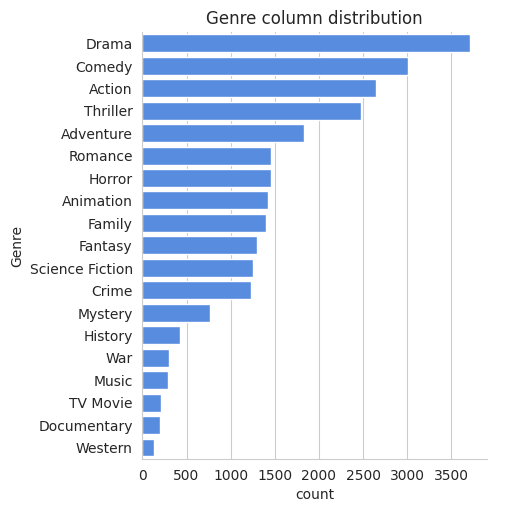

In [205]:
sns.catplot(y="Genre", data=df, kind="count", order=df["Genre"].value_counts().index, color="#4287f5")

plt.title("Genre column distribution")
plt.show()

##Q2 Which has highest votes in vote ave column?

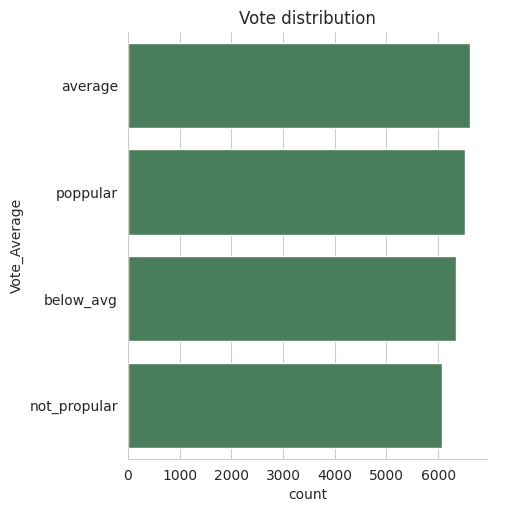

In [210]:
sns.catplot(y="Vote_Average", data = df, kind="count", order=df["Vote_Average"].value_counts().index, color="#428559")

plt.title("Vote distribution")
plt.show()

## Q3) What movie got the highest popularity? what's its genre?

In [212]:
df[df["Popularity"] == df["Popularity"].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,poppular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,poppular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,poppular,Science Fiction


## Q4) What movie got the lowest popularity? what's its genre?

In [214]:
df[df["Popularity"] == df["Popularity"].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,poppular,War
25550,1984,Threads,13.354,186,poppular,Drama
25551,1984,Threads,13.354,186,poppular,Science Fiction


## Q5) Which year has the most filmmed movies?

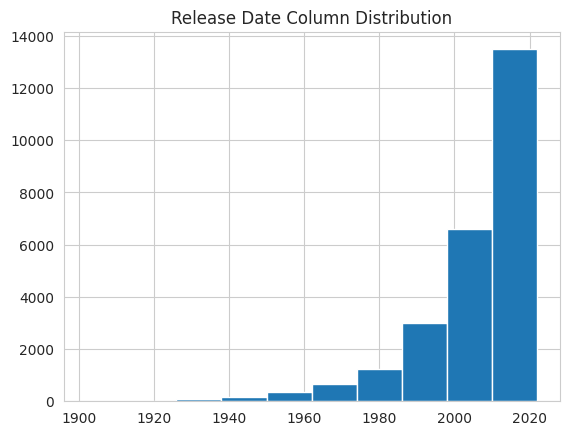

In [215]:
df["Release_Date"].hist()
plt.title("Release Date Column Distribution")
plt.show()

Conclusion

Q1) What is the most frepuent ganre in the dataset?

Ans => Drame genre is the most freuent genre in our dataset and has appeard more than 14% of the time among 19 other genres.

Q2) What genres has highest votes?

Ans => We have 25.5% of our dataset with popular vote (6520 rows ). Drama again gets the highest populariity among fans by being having more than 18.5% of movies

Q3) What movie got the highest popularity? what's its genre?

Ans => The united states, thread ' has the highest lowest rate in our dataset and it has genres of music, drama, "war", "sci-fi" and history'.

Q4) Which year has the most filmmed movies?

Ans => 2020 has the highest filmming rate in our dataset